In [149]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from pipeline import Pipeline, agent_vs_player, agent_vs_agent
import memory
import model
import agent

In [150]:
def smooth(data, window_size):
    return np.convolve(data, np.ones((window_size,))/window_size, mode='valid')

# TicTacToe

## Learning rate

In [151]:
wins_1 = [0.75, 0.82, 0.84, 0.74, 0.76, 0.77, 0.78, 0.74, 0.71, 0.77, 0.7, 0.79, 0.78, 0.73, 0.71, 0.77, 0.71, 0.68, 0.78, 0.76, 0.7, 0.8, 0.82, 0.73, 0.74, 0.76, 0.67, 0.78, 0.66, 0.65]
draws_1 = [0.02, 0.02, 0.0, 0.01, 0.01, 0.03, 0.0, 0.0, 0.03, 0.01, 0.0, 0.01, 0.0, 0.01, 0.01, 0.01, 0.02, 0.04, 0.03, 0.02, 0.03, 0.02, 0.0, 0.03, 0.02, 0.04, 0.05, 0.04, 0.06, 0.04]
losses_1 = np.ones(30) - wins_1 - draws_1

wins_2 = [0.8, 0.66, 0.6, 0.68, 0.69, 0.78, 0.73, 0.62, 0.79, 0.76, 0.73, 0.71, 0.77, 0.7, 0.66, 0.76, 0.69, 0.77, 0.7, 0.88, 0.79, 0.82, 0.7, 0.64, 0.71, 0.66, 0.66, 0.71, 0.8, 0.76]
draws_2 = [0.01, 0.02, 0.1, 0.04, 0.02, 0.03, 0.04, 0.08, 0.05, 0.03, 0.03, 0.06, 0.01, 0.03, 0.02, 0.04, 0.02, 0.02, 0.02, 0.02, 0.01, 0.03, 0.03, 0.06, 0.09, 0.04, 0.05, 0.03, 0.03, 0.04]
losses_2 = np.ones(30) - wins_2 - draws_2

wins_3 = [0.7, 0.67, 0.78, 0.66, 0.71, 0.75, 0.77, 0.77, 0.82, 0.84, 0.78, 0.81, 0.86, 0.87, 0.87, 0.78, 0.78, 0.78, 0.78, 0.84, 0.88, 0.8, 0.8, 0.82, 0.79, 0.77, 0.79, 0.83, 0.77, 0.75]
draws_3 = [0.06, 0.09, 0.07, 0.08, 0.08, 0.03, 0.05, 0.01, 0.01, 0.02, 0.03, 0.03, 0.02, 0.01, 0.01, 0.0, 0.03, 0.03, 0.03, 0.02, 0.01, 0.0, 0.0, 0.01, 0.0, 0.02, 0.03, 0.01, 0.03, 0.04]
losses_3 = np.ones(30) - wins_3 - draws_3

wins_4 = [0.75, 0.77, 0.79, 0.66, 0.79, 0.78, 0.83, 0.8, 0.85, 0.8, 0.85, 0.81, 0.82, 0.78, 0.85, 0.85, 0.83, 0.87, 0.79, 0.83, 0.72, 0.81, 0.87, 0.84, 0.85, 0.76, 0.82, 0.88, 0.83, 0.84]
draws_4 = [0.05, 0.04, 0.01, 0.05, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.02, 0.01, 0.01, 0.0, 0.01, 0.02, 0.01, 0.02, 0.01, 0.0, 0.02, 0.01, 0.03, 0.0, 0.02, 0.03, 0.01, 0.01, 0.01, 0.0]
losses_4 = np.ones(30) - wins_4 -draws_4

### Win rates raw

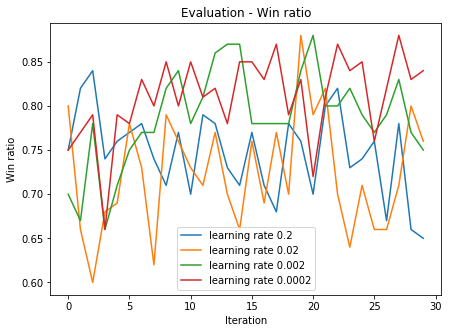

In [152]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_1, window_size), label="learning rate 0.2")
plt.plot(x, smooth(wins_2, window_size), label="learning rate 0.02")
plt.plot(x, smooth(wins_3, window_size), label="learning rate 0.002")
plt.plot(x, smooth(wins_4, window_size), label="learning rate 0.0002")

plt.legend(loc=0)
plt.show()

fig.savefig("plots/TicTacToe/lr/ttt_winrate_lr_ws_1.pdf", bbox_inches='tight')

### Win rates smoothed with window_size 3 (rolling average)

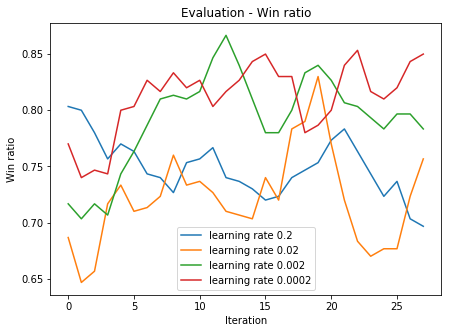

In [153]:
window_size = 3

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_1, window_size), label="learning rate 0.2")
plt.plot(x, smooth(wins_2, window_size), label="learning rate 0.02")
plt.plot(x, smooth(wins_3, window_size), label="learning rate 0.002")
plt.plot(x, smooth(wins_4, window_size), label="learning rate 0.0002")

plt.legend(loc=0)
plt.show()
fig.savefig("plots/TicTacToe/lr/ttt_winrate_lr_ws_3.pdf", bbox_inches='tight')

### Training loss 

In [154]:
# import data
train_loss_1 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_2-tag-loss.csv")
train_loss_1 = train_loss_1['Value'].values[:300]

train_loss_2 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_02-tag-loss.csv")
train_loss_2 = train_loss_2['Value'].values

train_loss_3 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_002-tag-loss.csv")
train_loss_3 = train_loss_3['Value'].values

train_loss_4 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_0002-tag-loss.csv")
train_loss_4 = train_loss_4['Value'].values

# length 
print(train_loss_1.shape)
print(train_loss_2.shape)
print(train_loss_3.shape)
print(train_loss_3.shape)

(300,)
(300,)
(300,)
(300,)


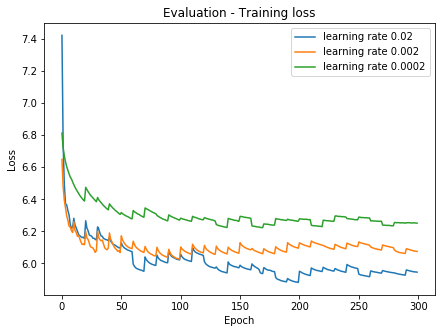

In [164]:
window_size = 1
first_iteration = 0

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Training loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

x = np.arange(300-window_size+1 - first_iteration)+first_iteration

#plt.plot(x, smooth(train_loss_1[first_iteration:],window_size), label="learning rate 0.2")
plt.plot(x, smooth(train_loss_2[first_iteration:],window_size), label="learning rate 0.02")
plt.plot(x, smooth(train_loss_3[first_iteration:],window_size), label="learning rate 0.002")
plt.plot(x, smooth(train_loss_4[first_iteration:],window_size), label="learning rate 0.0002")


plt.legend(loc=1)
plt.show()
fig.savefig("plots/TicTacToe/lr/ttt_loss_lr.pdf", bbox_inches='tight')

### Validation loss 

In [156]:
# import data
val_loss_1 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_2-tag-val_loss.csv")
val_loss_1 = val_loss_1['Value'].values[:300]

val_loss_2 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_02-tag-val_loss.csv")
val_loss_2 = val_loss_2['Value'].values

val_loss_3 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_002-tag-val_loss.csv")
val_loss_3 = val_loss_3['Value'].values

val_loss_4 = pd.read_csv("tictactoe_exp_lr/run_tictactoe_lr_0_0002-tag-val_loss.csv")
val_loss_4 = val_loss_4['Value'].values

# length 
print(val_loss_1.shape)
print(val_loss_2.shape)
print(val_loss_3.shape)
print(val_loss_4.shape)

(300,)
(300,)
(300,)
(300,)


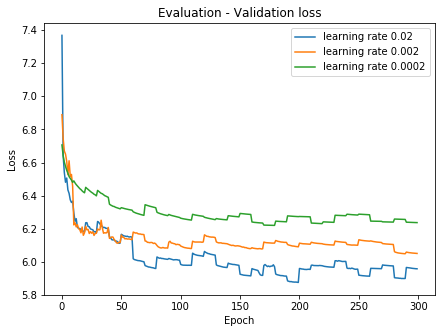

In [165]:
window_size = 1
first_iteration = 0
last_iteration = 300

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

x = np.arange(300 - window_size + 1 - first_iteration -(300-last_iteration)) + first_iteration

#plt.plot(x, smooth(val_loss_1[first_iteration:last_iteration],window_size), label="learning rate 0.2")
plt.plot(x, smooth(val_loss_2[first_iteration:last_iteration],window_size), label="learning rate 0.02")
plt.plot(x, smooth(val_loss_3[first_iteration:last_iteration],window_size), label="learning rate 0.002")
plt.plot(x, smooth(val_loss_4[first_iteration:last_iteration],window_size), label="learning rate 0.0002")


plt.legend(loc=1)
plt.show()
fig.savefig("plots/TicTacToe/lr/ttt_val_loss_lr.pdf", bbox_inches='tight')

## Regularization strength 

### Win rates

In [158]:
# 0.1
wins_4 = [0.75, 0.82, 0.8, 0.79, 0.78, 0.83, 0.75, 0.8, 0.81, 0.82, 0.78, 0.82, 0.72, 0.79, 0.87, 0.84, 0.89, 0.88, 0.88, 0.89, 0.82, 0.79, 0.85, 0.84, 0.87, 0.88, 0.91, 0.77, 0.88, 0.89]
draws_4 = [0.0, 0.0, 0.02, 0.03, 0.0, 0.02, 0.02, 0.0, 0.01, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.02, 0.0, 0.01, 0.0, 0.02, 0.02, 0.0, 0.0, 0.02, 0.01]

# 0.01
wins_1 = [0.71, 0.71, 0.75, 0.84, 0.81, 0.88, 0.8, 0.74, 0.82, 0.87, 0.88, 0.83, 0.95, 0.94, 0.86, 0.85, 0.89, 0.83, 0.8, 0.9, 0.89, 0.79, 0.76, 0.79, 0.84, 0.79, 0.85, 0.89, 0.86, 0.88]
draws_1 = [0.03, 0.04, 0.02, 0.0, 0.0, 0.03, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.03, 0.03, 0.05, 0.01, 0.0, 0.01, 0.0, 0.01, 0.0]
losses_1 = np.ones(30) - wins_1 -draws_1

# 0.001
wins_2 = [0.7, 0.87, 0.83, 0.78, 0.81, 0.78, 0.83, 0.83, 0.89, 0.86, 0.9, 0.88, 0.84, 0.78, 0.86, 0.76, 0.84, 0.75, 0.85, 0.84, 0.84, 0.8, 0.82, 0.86, 0.79, 0.86, 0.8, 0.72, 0.82, 0.8]
draws_2 = [0.02, 0.04, 0.01, 0.02, 0.01, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.03, 0.02, 0.02, 0.01, 0.0, 0.0, 0.01, 0.02, 0.02, 0.0, 0.03, 0.01, 0.0, 0.03, 0.0, 0.01]

# 0.0001
wins_3 = [0.76, 0.72, 0.79, 0.79, 0.82, 0.89, 0.79, 0.86, 0.81, 0.86, 0.81, 0.77, 0.83, 0.83, 0.86, 0.81, 0.79, 0.83, 0.85, 0.8, 0.79, 0.77, 0.83, 0.79, 0.84, 0.85, 0.83, 0.81, 0.83, 0.76]
draws_3 = [0.01, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01, 0.0, 0.0, 0.03, 0.02, 0.03, 0.02, 0.01, 0.01, 0.02, 0.01, 0.0, 0.01, 0.0, 0.01, 0.02, 0.02, 0.0, 0.01, 0.0, 0.01, 0.02, 0.01, 0.02]
losses_3 = np.ones(30) - wins_3 -draws_3

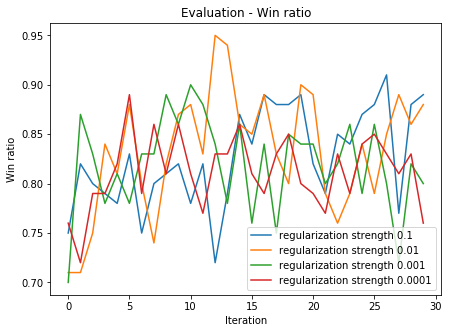

In [162]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_4, window_size), label="regularization strength 0.1")
plt.plot(x, smooth(wins_1, window_size), label="regularization strength 0.01")
plt.plot(x, smooth(wins_2, window_size), label="regularization strength 0.001")
plt.plot(x, smooth(wins_3, window_size), label="regularization strength 0.0001")

plt.legend(loc=4)
plt.show()
fig.savefig("plots/TicTacToe/reg/ttt_winrate_reg_ws_1.pdf", bbox_inches='tight')

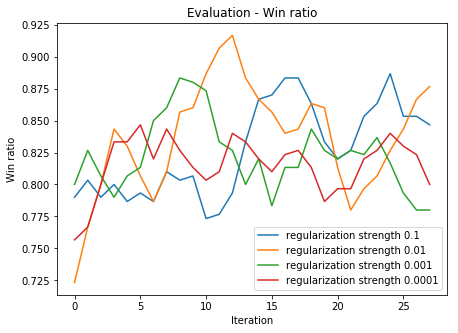

In [163]:
window_size = 3

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_4, window_size), label="regularization strength 0.1")
plt.plot(x, smooth(wins_1, window_size), label="regularization strength 0.01")
plt.plot(x, smooth(wins_2, window_size), label="regularization strength 0.001")
plt.plot(x, smooth(wins_3, window_size), label="regularization strength 0.0001")

plt.legend(loc=4)
plt.show()
fig.savefig("plots/TicTacToe/reg/ttt_winrate_reg_ws_3.pdf", bbox_inches='tight')

### Training loss

In [113]:
# import data
train_loss_1 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_1-tag-loss.csv")
train_loss_1 = train_loss_1['Value'].values

train_loss_2 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_01-tag-loss.csv")
train_loss_2 = train_loss_2['Value'].values

train_loss_3 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_001-tag-loss.csv")
train_loss_3 = train_loss_3['Value'].values

train_loss_4 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_0001-tag-loss.csv")
train_loss_4 = train_loss_4['Value'].values
# length 
print(train_loss_1.shape)
print(train_loss_2.shape)
print(train_loss_3.shape)
print(train_loss_4.shape)

(300,)
(300,)
(300,)
(300,)


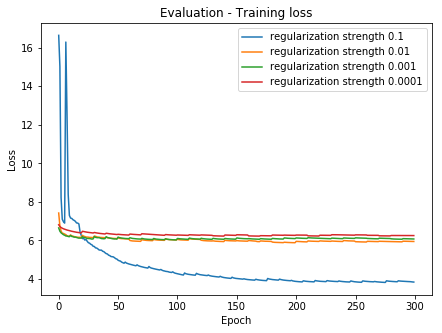

In [166]:
window_size = 1
first_iteration = 0

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Training loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

x = np.arange(300-window_size+1 - first_iteration)+first_iteration

plt.plot(x, smooth(train_loss_1[first_iteration:],window_size), label="regularization strength 0.1")
plt.plot(x, smooth(train_loss_2[first_iteration:],window_size), label="regularization strength 0.01")
plt.plot(x, smooth(train_loss_3[first_iteration:],window_size), label="regularization strength 0.001")
plt.plot(x, smooth(train_loss_4[first_iteration:],window_size), label="regularization strength 0.0001")


plt.legend(loc=1)
plt.show()

fig.savefig("plots/TicTacToe/reg/ttt_loss_reg.pdf", bbox_inches='tight')

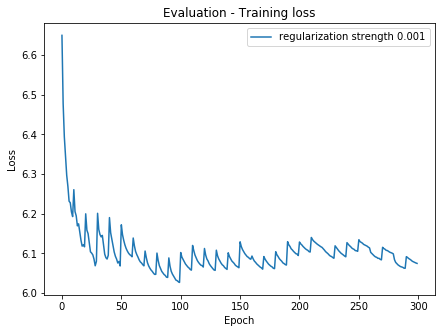

In [167]:
window_size = 1
first_iteration = 0

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Training loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

x = np.arange(300-window_size+1 - first_iteration)+first_iteration

plt.plot(x, smooth(train_loss_3[first_iteration:],window_size), label="regularization strength 0.001")


plt.legend(loc=1)
plt.show()

fig.savefig("plots/TicTacToe/reg/ttt_loss_reg_0_001.pdf", bbox_inches='tight')

### Validation loss

In [168]:
# import data
val_loss_1 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_1-tag-val_loss.csv")
val_loss_1 = val_loss_1['Value'].values

val_loss_2 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_01-tag-val_loss.csv")
val_loss_2 = val_loss_2['Value'].values

val_loss_3 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_001-tag-val_loss.csv")
val_loss_3 = val_loss_3['Value'].values

val_loss_4 = pd.read_csv("tictactoe_exp_reg/run_tictactoe_reg_strength_0_0001-tag-val_loss.csv")
val_loss_4 = val_loss_4['Value'].values

# length 
print(val_loss_1.shape)
print(val_loss_2.shape)
print(val_loss_3.shape)
print(val_loss_4.shape)

(300,)
(300,)
(300,)
(300,)


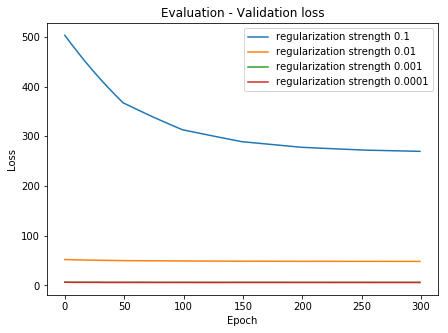

In [169]:
window_size = 1
first_iteration = 0
last_iteration = 300

fig = plt.figure(figsize=(7,5))
plt.title("Evaluation - Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

x = np.arange(300 - window_size + 1 - first_iteration -(300-last_iteration)) + first_iteration

plt.plot(x, smooth(val_loss_1[first_iteration:last_iteration],window_size), label="regularization strength 0.1")
plt.plot(x, smooth(val_loss_2[first_iteration:last_iteration],window_size), label="regularization strength 0.01")
plt.plot(x, smooth(val_loss_3[first_iteration:last_iteration],window_size), label="regularization strength 0.001")
plt.plot(x, smooth(val_loss_3[first_iteration:last_iteration],window_size), label="regularization strength 0.0001")

plt.legend(loc=1)
plt.show()
fig.savefig("plots/TicTacToe/reg/ttt_val_loss_reg.pdf", bbox_inches='tight')

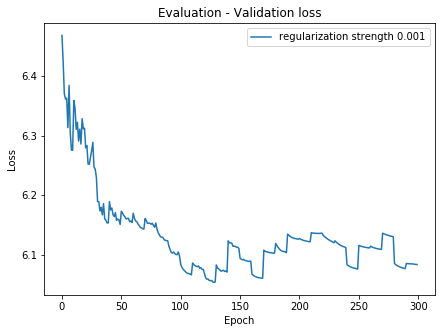

In [170]:
window_size = 1
first_iteration = 0
last_iteration = 300

fig = plt.figure(figsize=(7,5))
plt.title("Evaluation - Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

x = np.arange(300 - window_size + 1 - first_iteration -(300-last_iteration)) + first_iteration

plt.plot(x, smooth(val_loss_3[first_iteration:last_iteration],window_size), label="regularization strength 0.001")

plt.legend(loc=1)
plt.show()
fig.savefig("plots/TicTacToe/reg/ttt_val_loss_reg_0_001.pdf", bbox_inches='tight')


## $c_{puct}$ 

In [171]:
# c_puct 1
wins_1 = [0.83, 0.72, 0.87, 0.85, 0.78, 0.85, 0.8, 0.88, 0.86, 0.84, 0.86, 0.79, 0.78, 0.85, 0.8, 0.82, 0.85, 0.81, 0.74, 0.77, 0.87, 0.8, 0.8, 0.86, 0.78, 0.82, 0.77, 0.84, 0.79, 0.85]
draws_1 = [0.02, 0.01, 0.0, 0.0, 0.01, 0.01, 0.0, 0.0, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.02, 0.05, 0.01, 0.05, 0.04, 0.04, 0.01, 0.02, 0.03, 0.03, 0.02, 0.03, 0.02, 0.0, 0.02, 0.03]
losses_1 = np.ones(30) - wins_1 -draws_1
seen_trajectories_1 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000,]
unique_trajectories_1 = [  99,  197,  291,  386,  480,  570,  659,  753,  838, 925, 1004, 1079,
 1164, 1244, 1326, 1407, 1482, 1564, 1634, 1710, 1778, 1849, 1913, 1984,
 2055, 2125, 2183, 2250, 2324, 2391]

# c_puct 0.5
wins_2 = [0.78, 0.75, 0.87, 0.81, 0.8, 0.84, 0.79, 0.85, 0.79, 0.76, 0.87, 0.86, 0.77, 0.8, 0.86, 0.87, 0.85, 0.83, 0.86, 0.76, 0.84, 0.81, 0.84, 0.88, 0.82, 0.8, 0.83, 0.88, 0.89, 0.79]
draws_2 = [0.01, 0.05, 0.02, 0.0, 0.02, 0.0, 0.02, 0.0, 0.0, 0.01, 0.01, 0.02, 0.03, 0.0, 0.01, 0.0, 0.02, 0.02, 0.01, 0.02, 0.03, 0.02, 0.07, 0.0, 0.01, 0.01, 0.02, 0.01, 0.02, 0.05]
losses_2 = np.ones(30) - wins_2 -draws_2
seen_trajectories_2 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_2 = [  99,  197,  293,  388,  476,  564,  651,  735,  822,  903,  986, 1068,
 1143, 1213, 1286, 1366, 1449, 1527, 1599, 1679, 1754, 1825, 1891, 1960,
 2026, 2091, 2158, 2227, 2295, 2360]

# c_puct 1.5
wins_3 = [0.82, 0.79, 0.75, 0.74, 0.82, 0.8, 0.84, 0.85, 0.75, 0.85, 0.83, 0.83, 0.84, 0.79, 0.82, 0.81, 0.7, 0.74, 0.77, 0.89, 0.85, 0.77, 0.9, 0.84, 0.7, 0.83, 0.77, 0.83, 0.8, 0.77]
draws_3 = [0.01, 0.02, 0.01, 0.03, 0.0, 0.01, 0.01, 0.0, 0.02, 0.02, 0.0, 0.0, 0.01, 0.01, 0.0, 0.02, 0.05, 0.03, 0.04, 0.0, 0.01, 0.0, 0.01, 0.01, 0.03, 0.01, 0.03, 0.02, 0.01, 0.02]
losses_3 = np.ones(30) - wins_3 -draws_3
seen_trajectories_3 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_3 = [  99,  195,  288,  382,  474,  564,  651,  739,  824,  906,  989, 1076,
 1158, 1237, 1315, 1388, 1462, 1537, 1608, 1675, 1744, 1817, 1890, 1952,
 2017, 2089, 2149, 2212, 2274, 2339]

# c_puct 0.1
wins_4 = [0.71, 0.75, 0.71, 0.85, 0.78, 0.89, 0.79, 0.78, 0.74, 0.88, 0.88, 0.86, 0.83, 0.86, 0.89, 0.83, 0.87, 0.82, 0.84, 0.79, 0.83, 0.83, 0.71, 0.81, 0.85, 0.88, 0.91, 0.82, 0.87, 0.86]
draws_4 = [0.01, 0.02, 0.01, 0.01, 0.03, 0.0, 0.01, 0.01, 0.01, 0.02, 0.01, 0.0, 0.01, 0.01, 0.0, 0.01, 0.01, 0.01, 0.01, 0.02, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
losses_4 = np.ones(30) - wins_4 -draws_4
seen_trajectories_4 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_4 = [  99,  194,  290,  380,  468,  556,  633,  710,  797,  872,  956, 1037,
 1113, 1197, 1279, 1351, 1422, 1496, 1573, 1641, 1707, 1775, 1849, 1932,
 2005, 2074, 2136, 2205, 2258, 2318]

# c_puct 5
wins_5 = [0.73, 0.78, 0.82, 0.89, 0.85, 0.82, 0.78, 0.87, 0.84, 0.87, 0.81, 0.89, 0.83, 0.83, 0.86, 0.85, 0.85, 0.83, 0.93, 0.86, 0.86, 0.86, 0.85, 0.88, 0.84, 0.81, 0.82, 0.75, 0.8, 0.84]
draws_5 = [0.01, 0.03, 0.02, 0.0, 0.05, 0.01, 0.02, 0.0, 0.0, 0.0, 0.01, 0.03, 0.01, 0.03, 0.01, 0.0, 0.0, 0.01, 0.0, 0.0, 0.01, 0.03, 0.04, 0.01, 0.01, 0.01, 0.01, 0.03, 0.01, 0.04]
losses_5 = np.ones(30) - wins_5 -draws_5
seen_trajectories_5 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_5 = [ 100,  199,  296,  393,  491,  583,  675,  765,  861,  956, 1049, 1138,
 1224, 1316, 1407, 1498, 1587, 1669, 1757, 1834, 1915, 1993, 2077, 2153,
 2229, 2309, 2387, 2459, 2526, 2599]

# c_puct 10
wins_6 = [0.74, 0.75, 0.71, 0.73, 0.78, 0.83, 0.81, 0.72, 0.75, 0.89, 0.87, 0.83, 0.76, 0.79, 0.82, 0.79, 0.82, 0.79, 0.8, 0.76, 0.8, 0.77, 0.77, 0.91, 0.82, 0.82, 0.75, 0.72, 0.87, 0.84]
draws_6 = [0.04, 0.0, 0.01, 0.01, 0.02, 0.01, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.06, 0.03, 0.03, 0.04, 0.02, 0.01, 0.02, 0.05, 0.01, 0.01, 0.05, 0.0, 0.05, 0.02, 0.0, 0.0]
losses_6 = np.ones(30) - wins_6 -draws_6
seen_trajectories_6 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_6 = [ 100,  200,  300,  400,  494,  592,  689,  785,  880,  978, 1074, 1167,
 1264, 1354, 1448, 1540, 1634, 1728, 1817, 1908, 1997, 2081, 2174, 2264,
 2352, 2442, 2525, 2612, 2692, 2782]

### Exploration

In [172]:
exp_rate_1 = np.array(unique_trajectories_1)/np.array(seen_trajectories_1)
exp_rate_2 = np.array(unique_trajectories_2)/np.array(seen_trajectories_2)
exp_rate_3 = np.array(unique_trajectories_3)/np.array(seen_trajectories_3)
exp_rate_4 = np.array(unique_trajectories_4)/np.array(seen_trajectories_4)
exp_rate_5 = np.array(unique_trajectories_5)/np.array(seen_trajectories_5)
exp_rate_6 = np.array(unique_trajectories_6)/np.array(seen_trajectories_6)

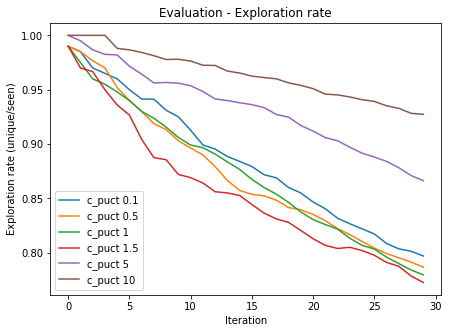

In [175]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Exploration rate")

plt.xlabel("Iteration")
plt.ylabel("Exploration rate (unique/seen)")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(exp_rate_1, window_size), label="c_puct 0.1")
plt.plot(x, smooth(exp_rate_2, window_size), label="c_puct 0.5")
plt.plot(x, smooth(exp_rate_3, window_size), label="c_puct 1")
plt.plot(x, smooth(exp_rate_4, window_size), label="c_puct 1.5")
plt.plot(x, smooth(exp_rate_5, window_size), label="c_puct 5")
plt.plot(x, smooth(exp_rate_6, window_size), label="c_puct 10")

plt.legend(loc=3)
plt.show()

fig.savefig("plots/TicTacToe/exp/ttt_exp_rate.pdf", bbox_inches='tight')

### Win rate

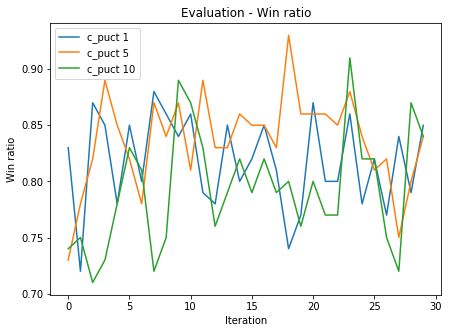

In [128]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

#plt.plot(x, smooth(wins_4, window_size), label="c_puct 0.1")
#plt.plot(x, smooth(wins_2, window_size), label="c_puct 0.5")
plt.plot(x, smooth(wins_1, window_size), label="c_puct 1")
#plt.plot(x, smooth(wins_3, window_size), label="c_puct 1.5")
plt.plot(x, smooth(wins_5, window_size), label="c_puct 5")
plt.plot(x, smooth(wins_6, window_size), label="c_puct 10")

plt.legend(loc=2)
plt.show()
fig.savefig("plots/TicTacToe/exp/ttt_win_rate_exp_ws_1.pdf", bbox_inches='tight')

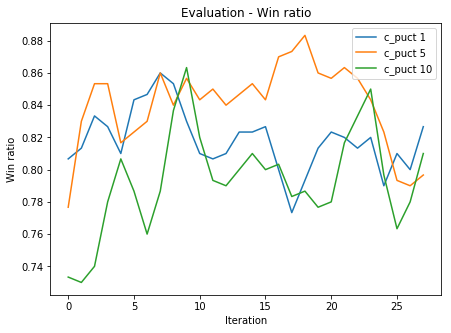

In [176]:
window_size = 3

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

#plt.plot(x, smooth(wins_4, window_size), label="c_puct 0.1")
#plt.plot(x, smooth(wins_2, window_size), label="c_puct 0.5")
plt.plot(x, smooth(wins_1, window_size), label="c_puct 1")
#plt.plot(x, smooth(wins_3, window_size), label="c_puct 1.5")
plt.plot(x, smooth(wins_5, window_size), label="c_puct 5")
plt.plot(x, smooth(wins_6, window_size), label="c_puct 10")

plt.legend(loc=1)
plt.show()
fig.savefig("plots/TicTacToe/exp/ttt_win_rate_exp_ws_3.pdf", bbox_inches='tight')

## Number of simulations

In [177]:
# 1 simulation
wins_1 = [0.54, 0.48, 0.56, 0.57, 0.57, 0.58, 0.67, 0.6, 0.61, 0.57, 0.66, 0.62, 0.62, 0.66, 0.55, 0.57, 0.52, 0.59, 0.55, 0.65, 0.68, 0.56, 0.7, 0.57, 0.54, 0.6, 0.58, 0.72, 0.67, 0.59]
draws_1 = [0.23, 0.16, 0.04, 0.1, 0.09, 0.05, 0.07, 0.06, 0.09, 0.07, 0.02, 0.06, 0.04, 0.06, 0.02, 0.03, 0.07, 0.07, 0.12, 0.11, 0.1, 0.11, 0.03, 0.07, 0.11, 0.08, 0.02, 0.09, 0.04, 0.08]
seen_trajectories_1 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000,]
unique_trajectories_1 = [ 100,  199,  292,  379,  449,  508,  568,  624,  660,  709,  748,  788,
  813,  843,  874,  899,  924,  943,  966,  978,  990, 1007, 1021, 1037,
 1047, 1060, 1070, 1077, 1090, 1104]

# 5 simulations
wins_2 = [0.67, 0.66, 0.77, 0.78, 0.74, 0.76, 0.83, 0.83, 0.8, 0.78, 0.87, 0.74, 0.87, 0.79, 0.78, 0.79, 0.79, 0.88, 0.82, 0.67, 0.82, 0.72, 0.83, 0.79, 0.84, 0.8, 0.8, 0.69, 0.79, 0.73]
draws_2 = [0.07, 0.05, 0.01, 0.0, 0.01, 0.02, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
seen_trajectories_2 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_2 = [ 100,  200,  298,  394,  487,  580,  657,  730,  798,  869,  919,  957,
  981, 1006, 1013, 1027, 1032, 1037, 1039, 1042, 1042, 1042, 1044, 1046,
 1047, 1051, 1052, 1055, 1055, 1057]

# 10 simulations
wins_3 = [0.76, 0.78, 0.75, 0.76, 0.81, 0.88, 0.71, 0.75, 0.72, 0.85, 0.85, 0.89, 0.87, 0.87, 0.86, 0.86, 0.81, 0.85, 0.83, 0.87, 0.8, 0.83, 0.83, 0.88, 0.9, 0.87, 0.87, 0.86, 0.85, 0.86]
draws_3 = [0.02, 0.06, 0.03, 0.03, 0.01, 0.01, 0.03, 0.02, 0.02, 0.03, 0.0, 0.01, 0.0, 0.0, 0.02, 0.0, 0.01, 0.0, 0.02, 0.02, 0.02, 0.04, 0.01, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
seen_trajectories_3 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_3 = [  99,  198,  298,  396,  490,  585,  680,  778,  866,  956, 1051, 1138,
 1216, 1292, 1377, 1455, 1539, 1628, 1705, 1779, 1860, 1929, 2004, 2080,
 2145, 2216, 2284, 2349, 2421, 2487,]

# 25 simulations
wins_4 = [0.68, 0.61, 0.76, 0.79, 0.76, 0.81, 0.74, 0.87, 0.72, 0.8, 0.9, 0.76, 0.89, 0.81, 0.86, 0.86, 0.8, 0.88, 0.82, 0.83, 0.83, 0.87, 0.85, 0.88, 0.82, 0.8, 0.85, 0.77, 0.76, 0.83]
draws_4 = [0.07, 0.05, 0.03, 0.01, 0.0, 0.01, 0.01, 0.01, 0.02, 0.03, 0.01, 0.02, 0.0, 0.0, 0.0, 0.0, 0.03, 0.01, 0.0, 0.02, 0.02, 0.0, 0.03, 0.0, 0.01, 0.01, 0.03, 0.0, 0.02, 0.01]
seen_trajectories_4= [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_4 = [ 100,  198,  297,  394,  491,  585,  682,  777,  873,  963, 1053, 1139,
 1231, 1321, 1410, 1497, 1577, 1664, 1754, 1838, 1925, 2004, 2089, 2164,
 2239, 2309, 2385, 2463, 2541, 2619,]

# 50 simulations
wins_5 = [0.7, 0.71, 0.72, 0.83, 0.75, 0.87, 0.8, 0.86, 0.83, 0.77, 0.86, 0.84, 0.83, 0.78, 0.89, 0.82, 0.79, 0.84, 0.8, 0.83, 0.73, 0.86, 0.87, 0.83, 0.76, 0.81, 0.78, 0.8, 0.75, 0.84]
draws_5 = [0.1, 0.04, 0.05, 0.01, 0.02, 0.04, 0.04, 0.0, 0.0, 0.01, 0.03, 0.05, 0.01, 0.01, 0.0, 0.02, 0.04, 0.03, 0.0, 0.02, 0.03, 0.01, 0.0, 0.0, 0.02, 0.02, 0.0, 0.02, 0.07, 0.03]
seen_trajectories_5 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000,]
unique_trajectories_5 = [ 100,  198,  295,  393,  489,  585,  682,  770,  861,  950, 1044, 1136,
 1228, 1311, 1393, 1481, 1564, 1652, 1735, 1815, 1905, 1991, 2076, 2157,
 2228, 2308, 2381, 2455, 2531, 2609,]

### Win rate

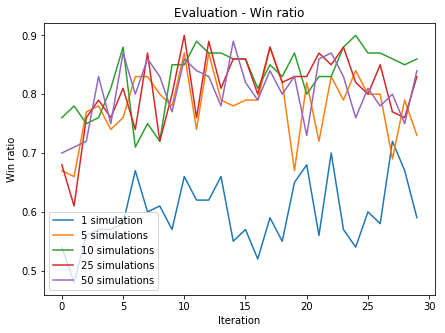

In [185]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_1, window_size), label="1 simulation")
plt.plot(x, smooth(wins_2, window_size), label="5 simulations")
plt.plot(x, smooth(wins_3, window_size), label="10 simulations")
plt.plot(x, smooth(wins_4, window_size), label="25 simulations")
plt.plot(x, smooth(wins_5, window_size), label="50 simulations")

plt.legend(loc=3)
plt.show()
fig.savefig("plots/TicTacToe/sim/ttt_win_rate_num_sim_ws_1.pdf", bbox_inches='tight')

## Exploration rate

In [186]:
exp_rate_1 = np.array(unique_trajectories_1)/np.array(seen_trajectories_1)
exp_rate_2 = np.array(unique_trajectories_2)/np.array(seen_trajectories_2)
exp_rate_3 = np.array(unique_trajectories_3)/np.array(seen_trajectories_3)
exp_rate_4 = np.array(unique_trajectories_4)/np.array(seen_trajectories_4)
exp_rate_5 = np.array(unique_trajectories_5)/np.array(seen_trajectories_5)

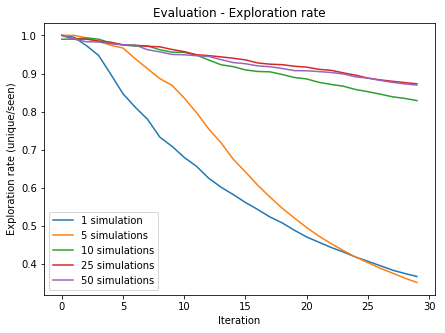

In [188]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Exploration rate")

plt.xlabel("Iteration")
plt.ylabel("Exploration rate (unique/seen)")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(exp_rate_1, window_size), label="1 simulation")
plt.plot(x, smooth(exp_rate_2, window_size), label="5 simulations")
plt.plot(x, smooth(exp_rate_3, window_size), label="10 simulations")
plt.plot(x, smooth(exp_rate_4, window_size), label="25 simulations")
plt.plot(x, smooth(exp_rate_5, window_size), label="50 simulations")

plt.legend(loc=3)
plt.show()
fig.savefig("plots/TicTacToe/sim/ttt_exp_rate_num_sim.pdf", bbox_inches='tight')

# ConnectFour

In [189]:
# c_puct 1
wins_1 = [0.71, 0.7, 0.7, 0.75, 0.71, 0.65, 0.75, 0.68, 0.73, 0.67, 0.77, 0.76, 0.76, 0.79, 0.69, 0.75, 0.74, 0.72, 0.79, 0.8, 0.72, 0.81, 0.77, 0.78, 0.64, 0.69, 0.73, 0.76, 0.72, 0.74]
draws_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
losses_1 = np.ones(30) - wins_1 - draws_1
seen_trajectories_1 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_1 = [ 100,  200,  300,  400,  500,  599,  698,  798,  898,  998, 1098, 1198,
 1298, 1398, 1498, 1598, 1698, 1798, 1897, 1997, 2097, 2197, 2297, 2397,
 2497, 2597, 2697, 2797, 2897, 2997]

# c_puct 0.5
wins_2 = [0.68, 0.56, 0.61, 0.58, 0.71, 0.6, 0.65, 0.58, 0.66, 0.59, 0.75, 0.68, 0.74, 0.67, 0.7, 0.63, 0.67, 0.63, 0.66, 0.71, 0.65, 0.69, 0.75, 0.67, 0.61, 0.69, 0.68, 0.72, 0.78, 0.66]
draws_2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
losses_2 = np.ones(30) - wins_2 - draws_2
seen_trajectories_2 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_2 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2199, 2299, 2399,
 2499, 2598, 2698, 2797, 2897, 2997]
# c_puct 1.5
wins_3 = [0.69, 0.67, 0.69, 0.75, 0.75, 0.75, 0.68, 0.72, 0.66, 0.77, 0.7, 0.65, 0.69, 0.78, 0.7, 0.63, 0.72, 0.76, 0.68, 0.78, 0.72, 0.7, 0.69, 0.76, 0.69, 0.69, 0.75, 0.71, 0.64, 0.68]
draws_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
losses_3 = np.ones(30) - wins_3 - draws_3
seen_trajectories_3 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_3 = [ 100,  200,  300,  399,  499,  599,  699,  799,  899,  999, 1099, 1199,
 1299, 1399, 1499, 1599, 1699, 1799, 1899, 1999, 2099, 2199, 2299, 2399,
 2499, 2599, 2699, 2799, 2899, 2999]

# c_puct 0.1
wins_4 = [0.63, 0.79, 0.66, 0.6, 0.67, 0.62, 0.67, 0.64, 0.63, 0.64, 0.63, 0.73, 0.75, 0.6, 0.58, 0.61, 0.74, 0.69, 0.72, 0.68, 0.73, 0.58, 0.7, 0.69, 0.72, 0.63, 0.72, 0.64, 0.65, 0.65]
draws_4 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
losses_4 = np.ones(30) - wins_4 -draws_4
seen_trajectories_4 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_4 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]

# c_puct 5
wins_5 = [0.65, 0.69, 0.69, 0.71, 0.7, 0.58, 0.75, 0.69, 0.67, 0.73, 0.69, 0.72, 0.66, 0.71, 0.77, 0.75, 0.73, 0.72, 0.7, 0.71, 0.75, 0.71, 0.72, 0.71, 0.74, 0.65, 0.8, 0.74, 0.63, 0.75]
draws_5 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
losses_5 = np.ones(30) - wins_5 - draws_5
seen_trajectories_5 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_5 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]

# c_puct 10
wins_6 = [0.62, 0.57, 0.58, 0.66, 0.6, 0.66, 0.61, 0.63, 0.62, 0.63, 0.67, 0.68, 0.66, 0.58, 0.64, 0.72, 0.63, 0.64, 0.56, 0.63, 0.59, 0.64, 0.63, 0.67, 0.54, 0.61, 0.62, 0.64, 0.68, 0.53]
draws_6 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
losses_6 = np.ones(30) -wins_6, draws_6
seen_trajectories_6 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_6 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]

## $c_{puct}$

### Win rate

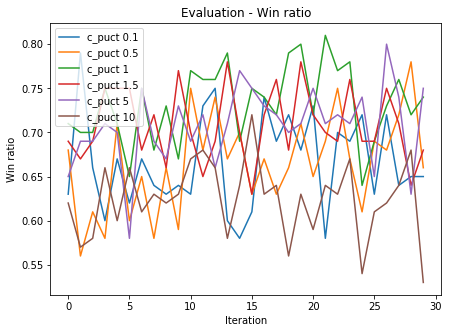

In [195]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_4, window_size), label="c_puct 0.1")
plt.plot(x, smooth(wins_2, window_size), label="c_puct 0.5")
plt.plot(x, smooth(wins_1, window_size), label="c_puct 1")
plt.plot(x, smooth(wins_3, window_size), label="c_puct 1.5")
plt.plot(x, smooth(wins_5, window_size), label="c_puct 5")
plt.plot(x, smooth(wins_6, window_size), label="c_puct 10")

plt.legend(loc=2)
plt.show

fig.savefig("plots/ConnectFour/exp/c4_win_rate_exp_ws_1.pdf", bbox_inches='tight')

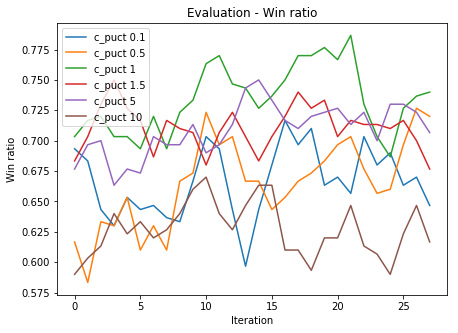

In [197]:
window_size = 3

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_4, window_size), label="c_puct 0.1")
plt.plot(x, smooth(wins_2, window_size), label="c_puct 0.5")
plt.plot(x, smooth(wins_1, window_size), label="c_puct 1")
plt.plot(x, smooth(wins_3, window_size), label="c_puct 1.5")
plt.plot(x, smooth(wins_5, window_size), label="c_puct 5")
plt.plot(x, smooth(wins_6, window_size), label="c_puct 10")

plt.legend(loc=2)
plt.show

fig.savefig("plots/ConnectFour/exp/c4_win_rate_exp_ws_3.pdf", bbox_inches='tight')

### Exploration rate

In [198]:
exp_rate_1 = np.array(unique_trajectories_1)/np.array(seen_trajectories_1)
exp_rate_2 = np.array(unique_trajectories_2)/np.array(seen_trajectories_2)
exp_rate_3 = np.array(unique_trajectories_3)/np.array(seen_trajectories_3)
exp_rate_4 = np.array(unique_trajectories_4)/np.array(seen_trajectories_4)
exp_rate_5 = np.array(unique_trajectories_5)/np.array(seen_trajectories_5)
exp_rate_6 = np.array(unique_trajectories_6)/np.array(seen_trajectories_6)

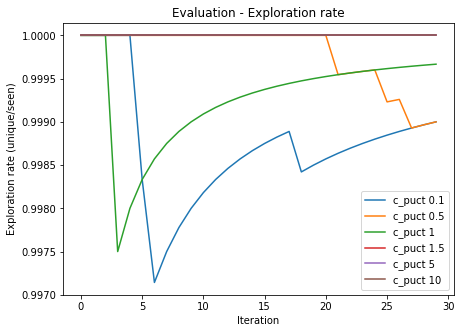

In [200]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Exploration rate")

plt.xlabel("Iteration")
plt.ylabel("Exploration rate (unique/seen)")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(exp_rate_1, window_size), label="c_puct 0.1")
plt.plot(x, smooth(exp_rate_2, window_size), label="c_puct 0.5")
plt.plot(x, smooth(exp_rate_3, window_size), label="c_puct 1")
plt.plot(x, smooth(exp_rate_4, window_size), label="c_puct 1.5")
plt.plot(x, smooth(exp_rate_5, window_size), label="c_puct 5")
plt.plot(x, smooth(exp_rate_6, window_size), label="c_puct 10")

plt.legend(loc=4)
plt.show()
fig.savefig("plots/ConnectFour/exp/c4_exp_rate.pdf", bbox_inches='tight')

## Number of simulations.

In [202]:
# 1 simulation
wins_1 = [0.67, 0.51, 0.62, 0.54, 0.5, 0.63, 0.58, 0.56, 0.61, 0.53, 0.63, 0.52, 0.43, 0.55, 0.57, 0.6, 0.65, 0.62, 0.56, 0.6, 0.53, 0.54, 0.47, 0.62, 0.56, 0.56, 0.42, 0.48, 0.53, 0.65]
draws_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
seen_trajectories_1 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_1 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]

# 5 simulations
wins_2 = [0.72, 0.55, 0.68, 0.59, 0.57, 0.59, 0.64, 0.69, 0.62, 0.75, 0.68, 0.64, 0.74, 0.65, 0.64, 0.68, 0.74, 0.65, 0.69, 0.61, 0.57, 0.62, 0.66, 0.71, 0.58, 0.67, 0.68, 0.66, 0.59, 0.71]
draws_2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
seen_trajectories_2 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_2 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1399, 1499, 1599, 1699, 1798, 1898, 1998, 2098, 2198, 2298, 2398,
 2496, 2596, 2695, 2793, 2893, 2992]

# 10 simulations
wins_3 = [0.77, 0.71, 0.71, 0.75, 0.7, 0.56, 0.7, 0.71, 0.75, 0.79, 0.67, 0.67, 0.72, 0.68, 0.76, 0.75, 0.82, 0.81, 0.73, 0.8, 0.74, 0.75, 0.67, 0.75, 0.73, 0.73, 0.78, 0.59, 0.64, 0.77]
draws_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
seen_trajectories_3 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_3 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1399, 1499, 1599, 1699, 1799, 1899, 1999, 2099, 2198, 2298, 2398,
 2498, 2598, 2697, 2797, 2897, 2997]

# 25 simulations
wins_4 = [0.61, 0.71, 0.73, 0.76, 0.74, 0.66, 0.68, 0.66, 0.75, 0.76, 0.67, 0.76, 0.77, 0.71, 0.7, 0.73, 0.79, 0.7, 0.72, 0.74, 0.86, 0.72, 0.74, 0.75, 0.73, 0.72, 0.78, 0.74, 0.76, 0.76]
draws_4 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
seen_trajectories_4= [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_4 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2199, 2299, 2398,
 2497, 2597, 2697, 2796, 2896, 2996]

# 50 simulations
wins_5 = [0.76, 0.6, 0.7, 0.7, 0.65, 0.73, 0.65, 0.66, 0.71, 0.77, 0.75, 0.74, 0.63, 0.75, 0.73, 0.69, 0.61, 0.69, 0.74, 0.7, 0.8, 0.72, 0.8, 0.7, 0.81, 0.73, 0.66, 0.74, 0.67, 0.77]
draws_5 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
seen_trajectories_5 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
 2500, 2600, 2700, 2800, 2900, 3000]
unique_trajectories_5 = [ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2099, 2199, 2299, 2399,
 2499, 2599, 2699, 2799, 2899, 2999]

### Win rate

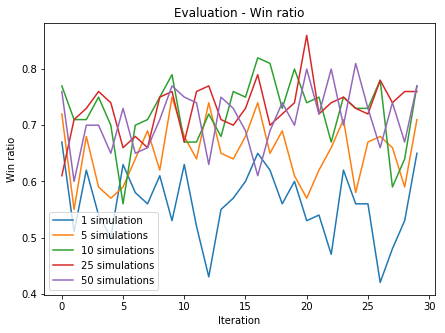

In [208]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_1, window_size), label="1 simulation")
plt.plot(x, smooth(wins_2, window_size), label="5 simulations")
plt.plot(x, smooth(wins_3, window_size), label="10 simulations")
plt.plot(x, smooth(wins_4, window_size), label="25 simulations")
plt.plot(x, smooth(wins_5, window_size), label="50 simulations")

plt.legend(loc=3)
plt.show()

fig.savefig("plots/ConnectFour/sim/c4_win_rate_num_sim_ws_1.pdf", bbox_inches='tight')

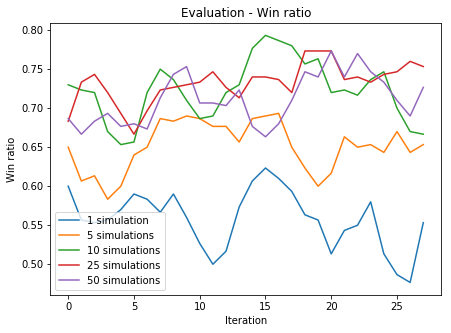

In [212]:
window_size = 3

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Win ratio")

plt.xlabel("Iteration")
plt.ylabel("Win ratio")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(wins_1, window_size), label="1 simulation")
plt.plot(x, smooth(wins_2, window_size), label="5 simulations")
plt.plot(x, smooth(wins_3, window_size), label="10 simulations")
plt.plot(x, smooth(wins_4, window_size), label="25 simulations")
plt.plot(x, smooth(wins_5, window_size), label="50 simulations")

plt.legend(loc=3)
plt.show()
fig.savefig("plots/ConnectFour/sim/c4_win_rate_num_sim_ws_3.pdf", bbox_inches='tight')

### Exploration rate

In [204]:
exp_rate_1 = np.array(unique_trajectories_1)/np.array(seen_trajectories_1)
exp_rate_2 = np.array(unique_trajectories_2)/np.array(seen_trajectories_2)
exp_rate_3 = np.array(unique_trajectories_3)/np.array(seen_trajectories_3)
exp_rate_4 = np.array(unique_trajectories_4)/np.array(seen_trajectories_4)
exp_rate_5 = np.array(unique_trajectories_5)/np.array(seen_trajectories_5)

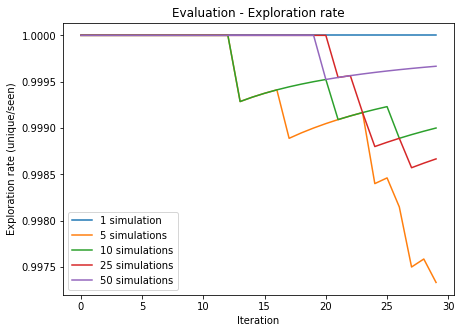

In [213]:
window_size = 1

fig = plt.figure(figsize=(7,5))

plt.title("Evaluation - Exploration rate")

plt.xlabel("Iteration")
plt.ylabel("Exploration rate (unique/seen)")

x = np.arange(30 - window_size + 1)

plt.plot(x, smooth(exp_rate_1, window_size), label="1 simulation")
plt.plot(x, smooth(exp_rate_2, window_size), label="5 simulations")
plt.plot(x, smooth(exp_rate_3, window_size), label="10 simulations")
plt.plot(x, smooth(exp_rate_4, window_size), label="25 simulations")
plt.plot(x, smooth(exp_rate_5, window_size), label="50 simulations")

plt.legend(loc=3)
plt.show()

fig.savefig("plots/ConnectFour/sim/c4_exp_rate_num_sim.pdf", bbox_inches='tight')